# Health Care for All Case Study (Lap EDA_Round Plotting)

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pylab import *

In [3]:
ca_df = pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round2.csv')

## Activity 3

### Which columns are numerical? 

In [4]:
numCols = ca_df.select_dtypes("number").columns
numCols = list(numCols)
numCols

['Unnamed: 0',
 'Customer Lifetime Value',
 'Income',
 'Monthly Premium Auto',
 'Months Since Last Claim',
 'Months Since Policy Inception',
 'Number of Open Complaints',
 'Number of Policies',
 'Total Claim Amount']

### Which columns are categorical? 

In [5]:
catCols = ca_df.select_dtypes("object").columns
catCols = list(catCols)
catCols

['Customer',
 'State',
 'Response',
 'Coverage',
 'Education',
 'Effective To Date',
 'EmploymentStatus',
 'Gender',
 'Location Code',
 'Marital Status',
 'Policy Type',
 'Policy',
 'Renew Offer Type',
 'Sales Channel',
 'Vehicle Class',
 'Vehicle Size',
 'Vehicle Type']

### Datetime format 
Extract the months from the dataset and store in a separate column. Then filter the data to show only the information for the first quarter


In [23]:
def return_first_digit(value):
    return int(value[0])

ca_df["Month"]= list(map(return_first_digit, ca_df["Effective To Date"]))


In [7]:
ca_q1_df = ca_df.loc[(ca_df["Month"]<4)]
ca_q1_df

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type,Month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


## Activity 4

### Get the numeric data into dataframe called numerical and categorical columns in a dataframe called categoricals. 
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)


In [8]:
def name_month(item):
    if item == 1:
        return "January"
    elif item == 2:
        return "February"
    elif item == 3:
        return "March"
    
ca_q1_df["Month"]= list(map(name_month, ca_q1_df["Month"]))


In [9]:
numerical_df = ca_q1_df[numCols].copy()
numerical_df

,Unnamed: 0,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [10]:
catCols = ca_q1_df.select_dtypes("object").columns
catCols = list(catCols)
catCols

categorical_df = ca_q1_df[catCols].copy()
categorical_df

,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,Vehicle Type,Month
0,DK49336,Arizona,No,Basic,College,2/18/11,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,NaN,February
1,KX64629,California,No,Basic,College,1/18/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,NaN,January
2,LZ68649,Washington,No,Basic,Bachelor,2/10/11,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A,February
3,XL78013,Oregon,Yes,Extended,College,1/11/11,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A,January
4,QA50777,Oregon,No,Premium,Bachelor,1/17/11,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,NaN,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,No,Premium,Bachelor,1/19/11,Unemployed,F,Suburban,Married,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A,January
10906,KX53892,Oregon,No,Basic,College,1/6/11,Employed,F,Urban,Married,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A,January
10907,TL39050,Arizona,No,Extended,Bachelor,2/6/11,Employed,F,Rural,Married,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,NaN,February
10908,WA60547,California,No,Premium,College,2/13/11,Employed,F,Urban,Divorced,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A,February


### Now we will try to check the normality of the numerical variables visually
- Use seaborn library to construct distribution plots for the numerical variables
- Use Matplotlib to construct histograms
- Do the distributions for different numerical variables look like a normal distribution 

/Users/louisarudow/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/louisarudow/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/louisarudow/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level functio

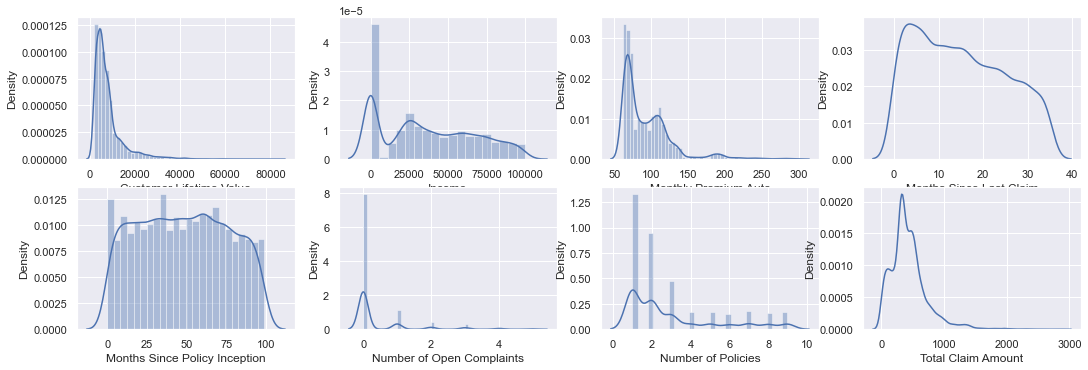

In [37]:
sns.set(rc={"figure.figsize": (18,12)}); np.random.seed(0)

subplot(4,4,1)
ax = sns.distplot(numerical_df['Customer Lifetime Value'])

subplot(4,4,2)
ax = sns.distplot(numerical_df['Income'])

subplot(4,4,3)
ax = sns.distplot(numerical_df['Monthly Premium Auto'])

subplot(4,4,4)
ax = sns.kdeplot(numerical_df['Months Since Last Claim'])

subplot(4,4,5)
ax = sns.distplot(numerical_df['Months Since Policy Inception'])

subplot(4,4,6)
ax = sns.distplot(numerical_df['Number of Open Complaints'])

subplot(4,4,7)
ax = sns.distplot(numerical_df['Number of Policies'])

subplot(4,4,8)
ax = sns.kdeplot(numerical_df['Total Claim Amount'])

plt.show()

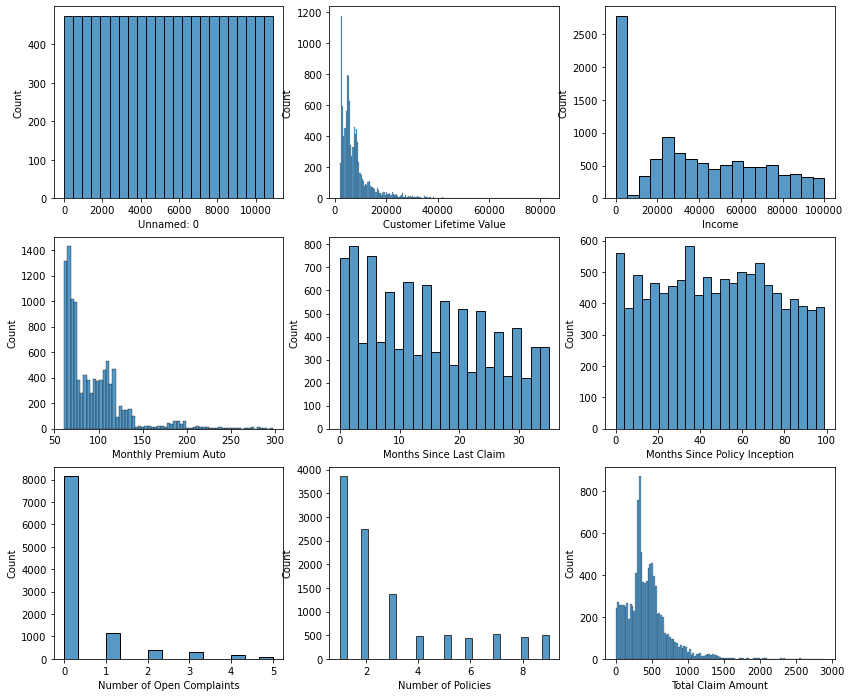

In [12]:
# Use seaborn library to construct distribution plots for the numerical variables

def distrib_plots(numerical_df):
    plt.figure(figsize = (14,12))
    for i, col in enumerate(numerical_df.columns, 1):
        plt.subplot(3,3,i)
        sns.histplot(numerical_df[col])
        
distrib_plots(numerical_df)

### For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable.
Drop one of the two features that show a high correlation between them (greater than 0.9). If there is no pair of features that have a high correlation, then do not drop any features.

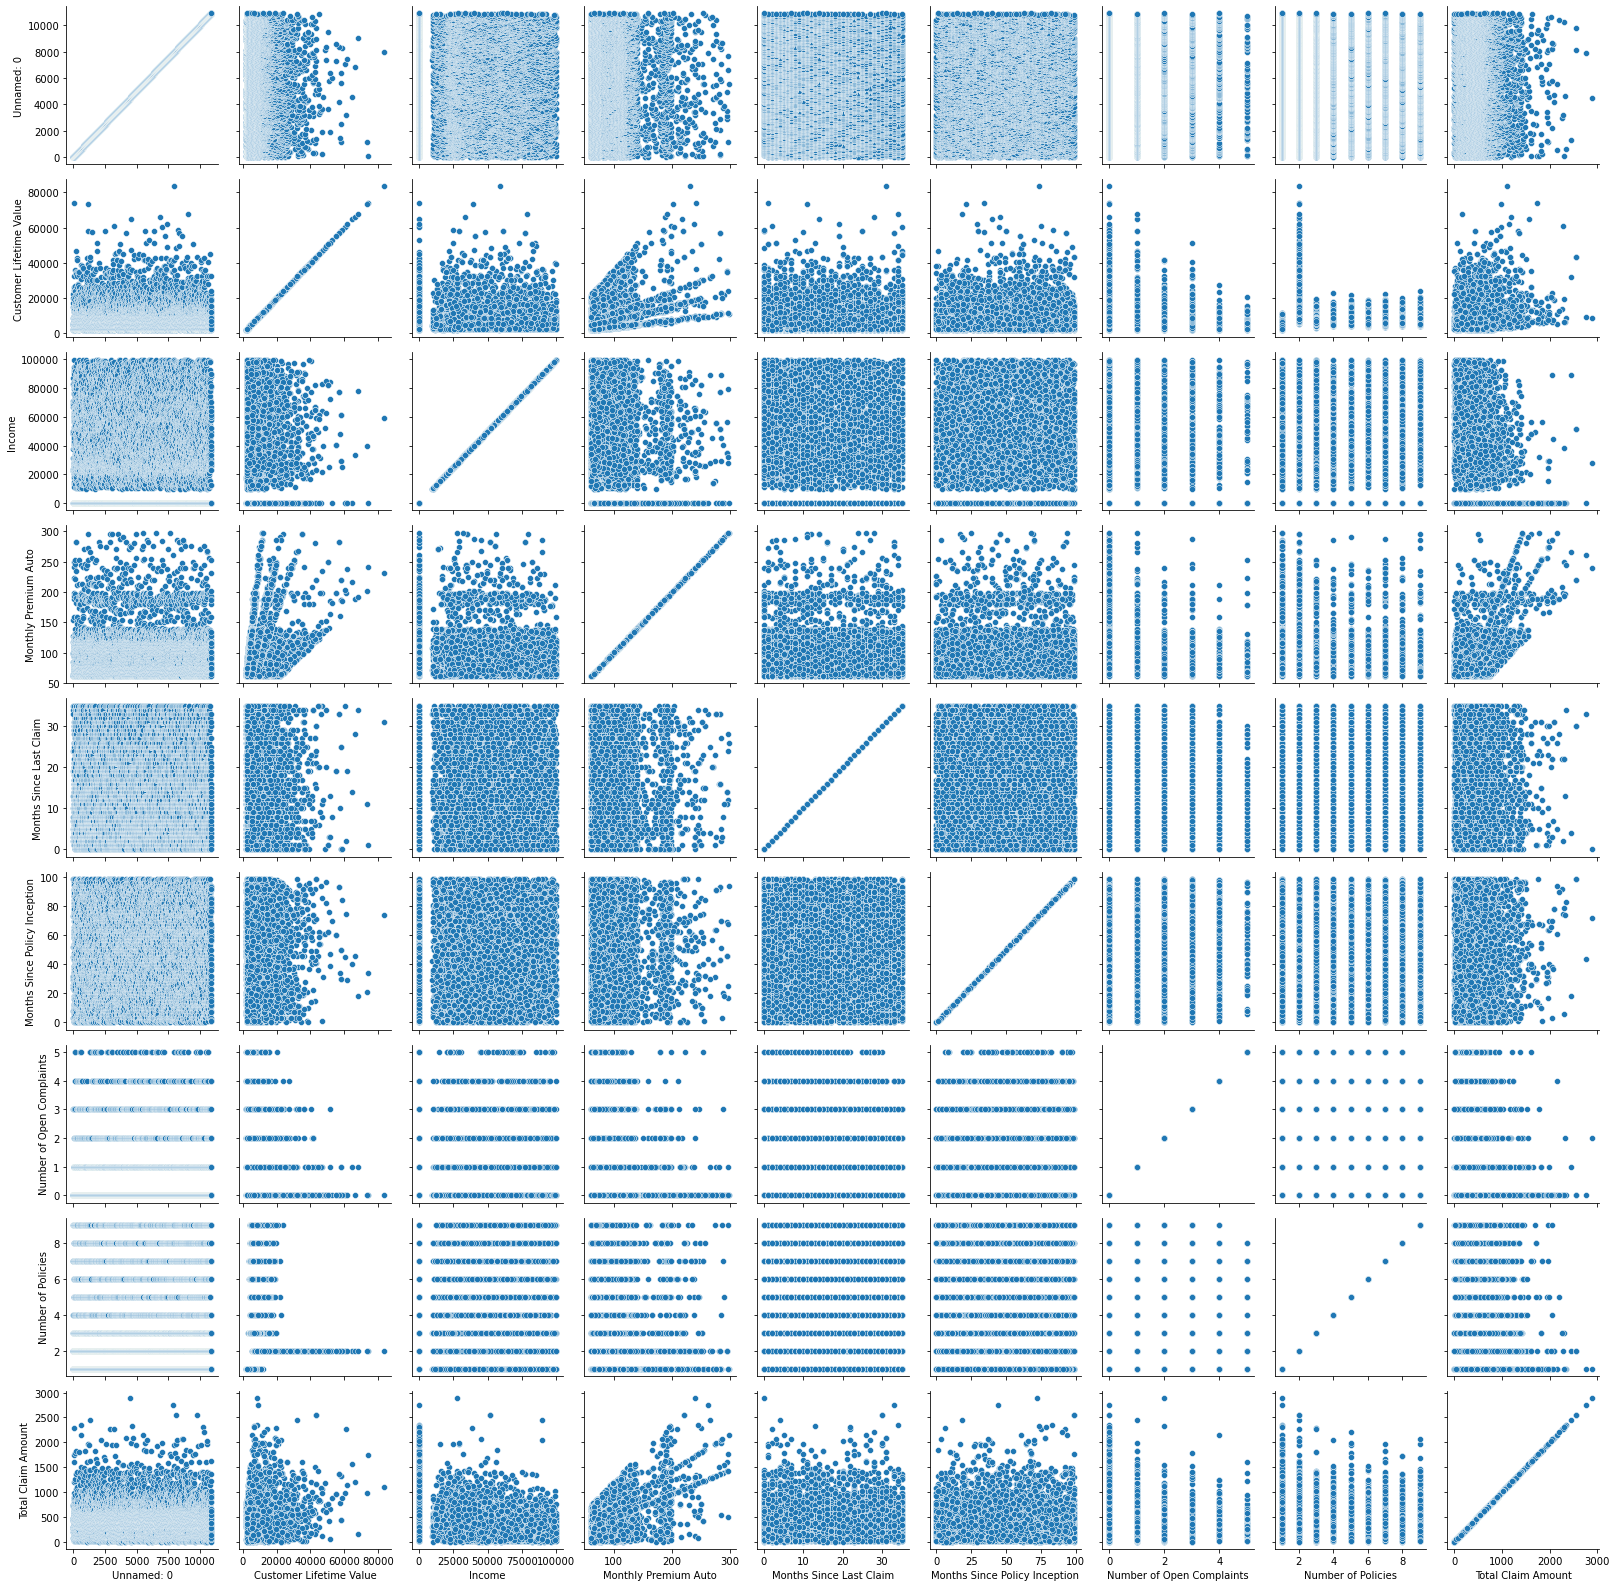

In [14]:
g = sns.PairGrid(numerical_df)
g.map(sns.scatterplot)

# There is no high correlation between the values, so no dropping

## Activity 5

### Show a plot of the total number of responses.

/Users/louisarudow/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Response', ylabel='count'>

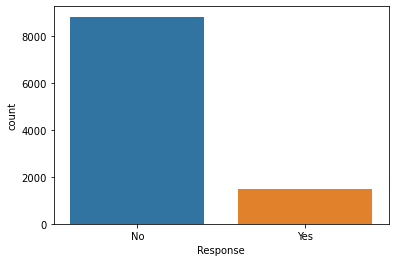

In [15]:
ns.countplot(categorical_df["Response"])

### Show a plot of the response rate by the sales channel.

<AxesSubplot:xlabel='Sales Channel', ylabel='count'>

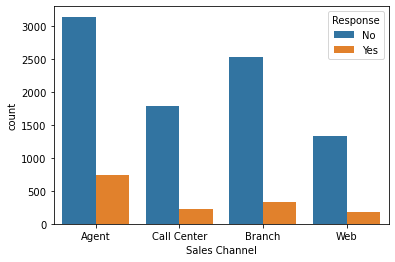

In [16]:
sns.countplot(x = categorical_df["Sales Channel"],y = None, hue=categorical_df["Response"], palette=None)


### Show a plot of the response rate by the total claim amount.

<AxesSubplot:xlabel='Total Claim Amount', ylabel='count'>

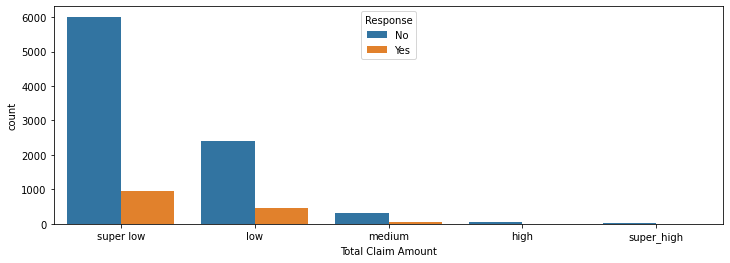

In [17]:
plt.figure(figsize = (12,4))
sns.countplot(x = pd.cut(numerical_df["Total Claim Amount"], bins=[0,500,1000,1500,2000,2500],labels=["super low","low","medium","high","super_high"]),y = None, hue=categorical_df["Response"],palette=None)


In [3]:
["Total Claim Amount"]

NameError: name 'numCols' is not defined

### Show a plot of the response rate by income.

<AxesSubplot:xlabel='Income', ylabel='count'>

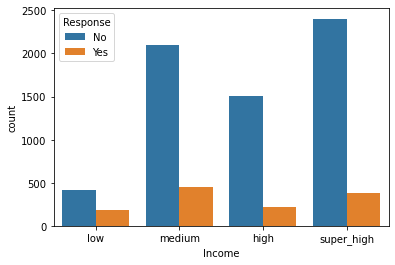

In [18]:
sns.countplot(x = pd.cut(numerical_df["Income"], bins=[0,20000,40000,60000,100000],labels=["low","medium","high","super_high"]),y = None, hue=categorical_df["Response"],palette=None)


### Plot the Correlation Heatmap.

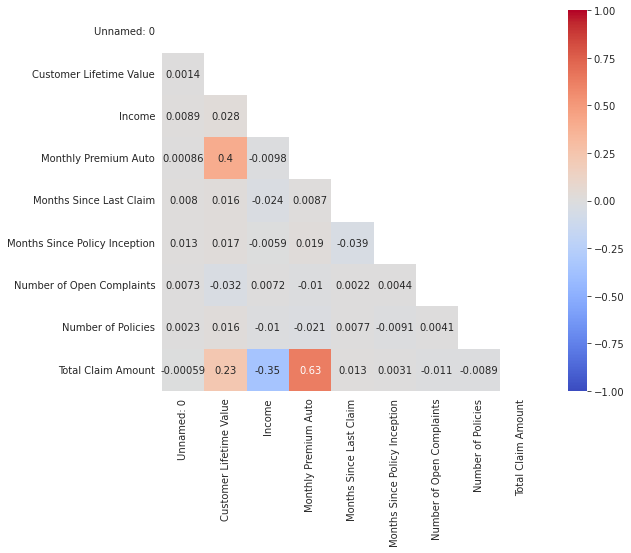

In [19]:
corr = numerical_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)